# Image Processing Demo

## Demo Instructions:
1. Read in a color image in a standard format (e.g. jpg, png, etc) into an array (likely an X x Y x 3 array)
2. Plot the original image from the array format data.
3. For a portion of the image, show the array values and the associated clip of the image.
4. Display the color histograms for each of the 3 colors in the image, and display a summary bar plot showing the relative amounts of Red, Green, and Blue (or whatever 3 color palette is used).
5. Pick 3 images that, in a natural way, vary in the amount of red, green, and blue and plot the relative amounts of each color for each (e.g. a rose, a tree, a beach scene with lots of sky)

## *Solutions:*

## 1.  Read in a color image in a standard format (e.g. jpg, png, etc) into an array (likely an X x Y x 3 array)

We first need to install a new package called biocLite, which is an open source software for bioinformatics.

Enter the following into your console:

In [18]:
source("http://bioconductor.org/biocLite.R")

biocLite("EBImage")

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.0 (2018-04-23).
Installing package(s) 'EBImage'
Warning message:
"package 'EBImage' is in use and will not be installed"installation path not writeable, unable to update packages: MASS, survival
Old packages: 'stringi'


If you are asked:

In [19]:
Update all/some/none? [a/s/n].

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: Update all
           ^


Answer with "a" in your console.

In [ ]:
library("EBImage")
source("http://bioconductor.org/biocLite.R")
biocLite("EBImage")

In [ ]:
library("EBImage")

Download the following image and put it in your working directory. https://en.wikipedia.org/wiki/Tabby_cat#/media/File:Cat_November_2010-1a.jpg

In [ ]:
img2 <- readImage("Cat_November_2010-1a (1).jpg")

In [ ]:
#Type the following:
catarray <- img2@.Data
catarray[1:8,1:8,1]

Let’s take an in-depth look at the previous line: catarray[1:8,1:8,1]

The first dimension  1:8 picks the rows 1 through 8. The second dimension 1:8  picks the columns 1 through 8. This results in an 8x8 matrix of the first 8x8 pixels. The third dimension 1 selects the color red.

In [ ]:
#This code performs similarly, except it selects the color green (note the 2 at the end instead of a 1 like before).
catarray[1:8,1:8,2]

In [ ]:
#This code selects the color blue (note the 3 at the end instead of a 1 or 2). 
catarray[1:8,1:8,3]

## 2. Plot the original image from the array format data.

In [ ]:
display(img2, method="browser")
dim(img2)
print(img2)

The display() function in R automatically plots arrays as an RGB image. You can see below that it takes in an argument of an object or array.


In [ ]:
#We can also display the array. Type the following into your console.
display(catarray, all=TRUE)

This gives pixel intensity values for the array of our image. The first frame shows red intensity values, the second frame shows green intensity values, and the third frame shows blue intensity values. 

## 3. For a portion of the image, show the array values and the associated clip of the image.

Let’s perform this on two images, one large and one small. 


In [ ]:
# A large cropped image
catface <- img2[412:1000, 260:1020, 1:3]
dim(catface) 
print(catface)
display(catface)

In [ ]:
# A small cropped image
smallcrop <- img2[500:506, 300:306, 1:3]
dim(smallcrop) 
print(smallcrop)
display(smallcrop)

## 4. Display the color histograms for each of the 3 colors in the image, and display a summary bar plot showing the relative amounts of Red, Green, and Blue (or whatever 3 color palette is used).


In [ ]:
# Create histogram.
hist(smallcrop)
hist(smallcrop, main = paste("Histogram of Colors for smallcrop"))

In [ ]:
# Create summary bar plot.
# catarray is an array of img2’s color intensity values
catarray <- img2@.Data
catarray[1:8,1:8,1]

In [ ]:
# select red, green, and blue values by altering third dimension
red <- catarray[,,1]
gr <- catarray[,,2]
bl <- catarray[,,3]

In [ ]:
# Take the average of the color intensity values 
avgred <- mean(red)
avggr <- mean(gr)
avgbl <- mean(bl)

In [ ]:
# Import libraries.
library(ggplot2)
library(tibble)

Tibble is a modern take on data frames. Tibbles are simplified data frames that do not have more complicated and messy functions that data frames do. The function that creates these tibbles are called “tribbles”. Note the difference carefully.


In [ ]:
bararray <- tribble(
  ~color,       ~average.intensity,
 "Red", avgred,
 "Green",   avggr,
 "Blue",  avgbl
)

bararray is an array that contains the bar plot data. The ~ indicates a header, which is the name of a column. The color values “Red”, “Green”, “Blue” indicate the x values of each bar. The average.intensity values avgred, avggr, avgbl indicate the y value/height of each bar.  


In [ ]:
# Create bar plot.

bplot <- ggplot(data = bararray) + 
geom_bar(mapping = aes(x = color, y = average.intensity, fill = color), stat="identity") + 
ggtitle("Average Intensity of Colors of img2")+ scale_fill_manual(values = c("#1E90FF", "#008000", "#FF0000"))
bplot


Note that "#1E90FF", "#008000", "#FF0000" are hexadecimal representations of green, blue, and red. 


## 5. Pick 3 images that, in a natural way, vary in the amount of red, green, and blue and plot the relative amounts of each color for each (e.g. a rose, a tree, a beach scene with lots of sky)

Download these example images in your current directory:
Rose: https://simple.wikipedia.org/wiki/Rose#/media/File:Rose_rouge.JPG
Fern: https://commons.wikimedia.org/wiki/File:Sa-fern.jpg
Sky:
https://eoimages.gsfc.nasa.gov/images/imagerecords/84000/84487/contrails_pho_2014127.jpg


In [ ]:
# Plot a mostly red image
rose <- readImage("Rose_rouge.JPG")
display(rose)
hist(rose, main=paste("Histogram of Rose"))

In [ ]:
# Plot a mostly green image
fern <- readImage("Sa-fern.jpg")
display(fern)
hist(fern, main=paste("Histogram of Fern"))

In [ ]:
# Plot a mostly Blue
sky <- readImage("contrails_pho_2014127.jpg")
display(sky)
hist(sky, main=paste("Histogram of Sky"))

If you look at the histogram of the sky, you can see that there are many different colors within the same sky image. You might be wondering as to why that is.


Here’s why we see blue when we look at the sky. The sun emits light at many different wavelengths. When all of those wavelengths are combined, the light looks white. Red light has a longer wavelength. Blue light has a shorter wavelength. Green is in between. When red light hits air particles, it does not bounce; it essentially goes straight through the air. When blue light hits air particles, it does bounce; it bounces in all directions. This is why you see the sky as blue. Blue light is coming from all directions, while red light is only visible on the line of sight that connects the sun to you. 


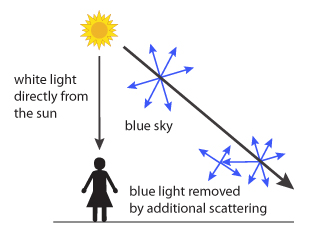

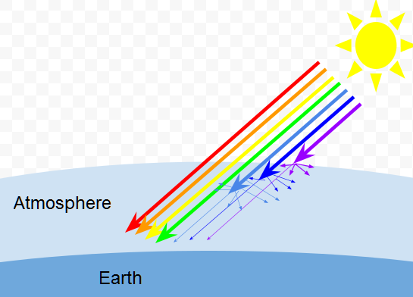